In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
df = pd.read_excel('6050735Material.xlsx')

In [ ]:
df.head()

,CALMONTH,DELIVERY_QTY
0,201601,497770
1,201602,1359120
2,201603,808012
3,201604,320732
4,201605,348394


In [ ]:
df.CALMONTH = df.CALMONTH.astype(str)

In [ ]:
df.CALMONTH = df.CALMONTH.apply(lambda x: datetime.strptime(x,'%Y%m'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CALMONTH      43 non-null     datetime64[ns]
 1   DELIVERY_QTY  43 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 816.0 bytes


In [ ]:
df.head()

,CALMONTH,DELIVERY_QTY
0,2016-01-01,497770
1,2016-02-01,1359120
2,2016-03-01,808012
3,2016-04-01,320732
4,2016-05-01,348394


In [ ]:
df = df.set_index("CALMONTH")

In [ ]:
df.head()

,DELIVERY_QTY
CALMONTH,
2016-01-01,497770
2016-02-01,1359120
2016-03-01,808012
2016-04-01,320732
2016-05-01,348394


In [ ]:
df.index.freq = 'MS'

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

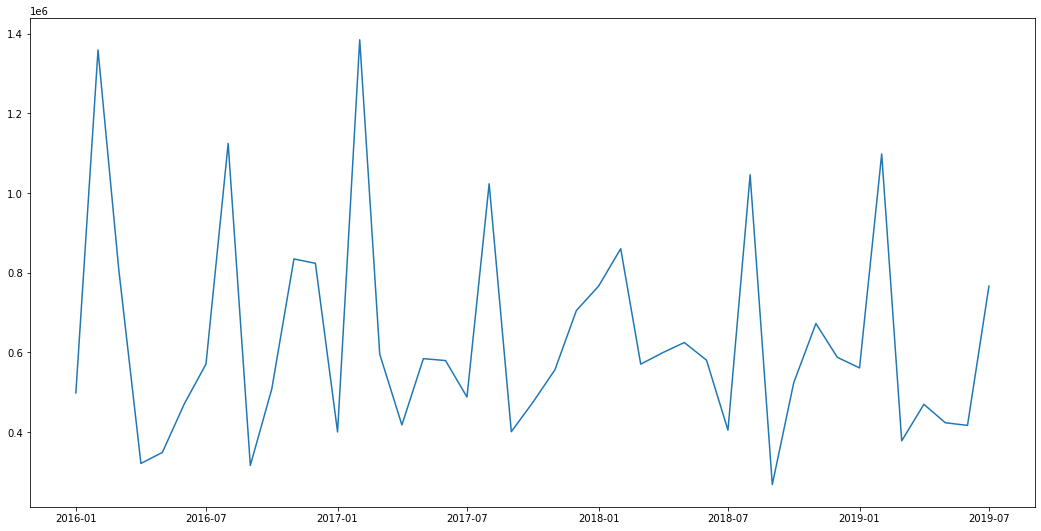

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df.DELIVERY_QTY, linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Delivery Qty')
plt.show();

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 

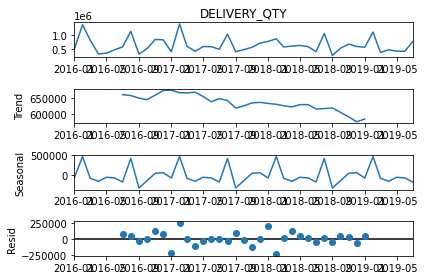

In [ ]:
a = seasonal_decompose(df.DELIVERY_QTY, model = "add")
a.plot();

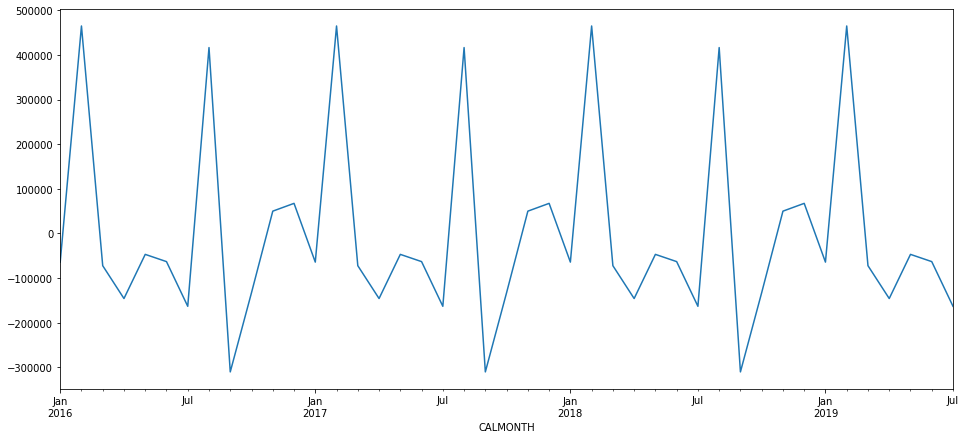

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
#pip install pmdarima

In [ ]:
auto_arima(df.DELIVERY_QTY, seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   43
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 12)   Log Likelihood                -587.822
Date:                            Tue, 15 Sep 2020   AIC                           1187.644
Time:                                    17:54:03   BIC                           1198.212
Sample:                                         0   HQIC                          1191.541
                                             - 43                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.404e+05   4.06e+04     15.768      0.000    5.61e+05     7.2e+05
ma.L1         -0.2923      0.270     -1.083      0.279      -0.821       0.236
ma.L2         -0.2695      0.297     -0.908      0.364      -0.852       0.313
ma.S.L12       0.5889      0.278      2.120      0.034       0.044       1.133
ma.S.L24       0.2905      0.487      0.596      0.551      -0.665       1.246
sigma2      5.262e+10      0.004   1.39e+13      0.000    5.26e+10    5.26e+10
===================================================================================
Ljung-Box (Q):                       57.22   Jarque-Bera (JB):                 6.05
Prob(Q):                              0.04   Prob(JB):                         0.05
Heteroskedasticity (H):               0.67   Skew:                             0.87
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.89e+29. Standard errors may be unstable.
"""

In [ ]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
arima_model = SARIMAX(train_data.DELIVERY_QTY, order = (0,0,2), seasonal_order = (0,0,2,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       DELIVERY_QTY   No. Observations:                   31
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 12)   Log Likelihood                -450.283
Date:                            Tue, 15 Sep 2020   AIC                            910.567
Time:                                    17:54:03   BIC                            917.737
Sample:                                01-01-2016   HQIC                           912.904
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6732      0.722      0.932      0.351      -0.743       2.089
ma.L2          0.2579      0.729      0.354      0.724      -1.171       1.687
ma.S.L12       0.4334      1.329      0.326      0.744      -2.172       3.039
ma.S.L24       0.1674      3.445      0.049      0.961      -6.585       6.919
sigma2      4.415e+11   4.81e-12   9.17e+22      0.000    4.42e+11    4.42e+11
===================================================================================
Ljung-Box (Q):                       38.12   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.15   Prob(JB):                         0.41
Heteroskedasticity (H):               0.22   Skew:                             0.54
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2018-08-01    481297.859303
2018-09-01    174631.752569
2018-10-01    183832.947229
2018-11-01    206302.274069
2018-12-01    267026.814836
2019-01-01    297078.719913
2019-02-01    273456.258109
2019-03-01    192709.937871
2019-04-01    233710.726191
2019-05-01    239743.369655
2019-06-01    214471.196045
2019-07-01    135459.629725
Freq: MS, Name: ARIMA Predictions, dtype: float64

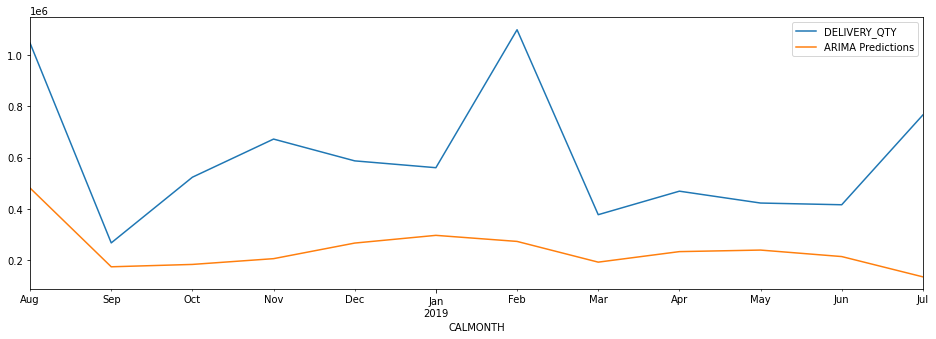

In [ ]:
test_data.DELIVERY_QTY.plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
arima_rmse_error = rmse(test_data.DELIVERY_QTY, arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df.DELIVERY_QTY.mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 172709528414.08624
RMSE Error: 415583.3591640626
Mean: 632467.7209302326


In [ ]:
test_data['ARIMA_Predictions'] = arima_pred

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=40)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0736
Epoch 2/40
19/19 [==============================] - 0s 9ms/step - loss: 0.0530
Epoch 3/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0539
Epoch 4/40
19/19 [==============================] - 0s 9ms/step - loss: 0.0498
Epoch 5/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0518
Epoch 6/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0529
Epoch 7/40
19/19 [==============================] - 0s 10ms/step - loss: 0.0505
Epoch 8/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0535
Epoch 9/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0558
Epoch 10/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0609
Epoch 11/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0443
Epoch 12/40
19/19 [==============================] -

In [ ]:
import numpy as np


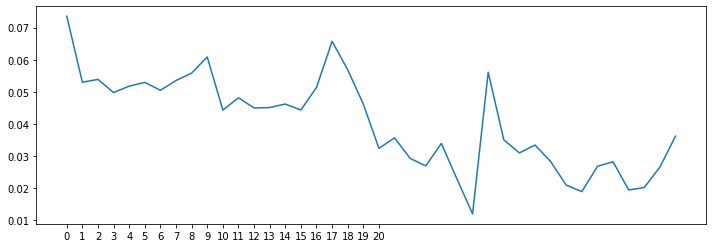

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions_scaled

[array([0.30893707], dtype=float32),
 array([0.17016308], dtype=float32),
 array([0.17123786], dtype=float32),
 array([0.17280386], dtype=float32),
 array([0.20025578], dtype=float32),
 array([0.21520782], dtype=float32),
 array([0.24271372], dtype=float32),
 array([0.16718067], dtype=float32),
 array([0.1720234], dtype=float32),
 array([0.17593522], dtype=float32),
 array([0.16646741], dtype=float32),
 array([0.16015205], dtype=float32)]

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [ ]:
lstm_predictions

array([[645964.35012817],
       [497648.81283134],
       [498797.4861871 ],
       [500471.16634816],
       [529810.5679189 ],
       [545790.64371014],
       [575187.74411166],
       [494461.34659177],
       [499637.04160041],
       [503817.82593924],
       [493699.04677552],
       [486949.46207607]])

In [ ]:
test_data['LSTM_Predictions'] = lstm_predictions

In [ ]:
test_data

,DELIVERY_QTY,ARIMA_Predictions,LSTM_Predictions
CALMONTH,,,
2018-08-01,1045646,481297.859303,645964.350128
2018-09-01,267702,174631.752569,497648.812831
2018-10-01,523570,183832.947229,498797.486187
2018-11-01,672050,206302.274069,500471.166348
2018-12-01,587186,267026.814836,529810.567919
2019-01-01,560580,297078.719913,545790.643710
2019-02-01,1097876,273456.258109,575187.744112
2019-03-01,377544,192709.937871,494461.346592
2019-04-01,469142,233710.726191,499637.041600


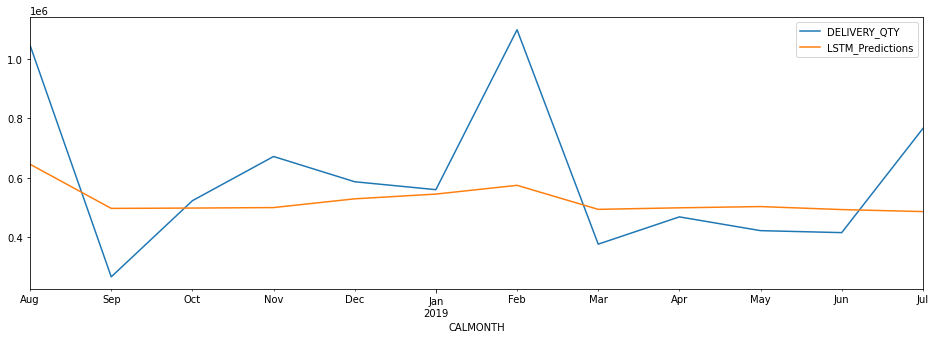

In [ ]:
test_data.DELIVERY_QTY.plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [ ]:
lstm_rmse_error = rmse(test_data.DELIVERY_QTY, test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df.DELIVERY_QTY.mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 52032059170.61782
RMSE Error: 228105.3685703557
Mean: 632467.7209302326


In [ ]:
df_pr = df.copy()
df_pr = df.reset_index()

In [ ]:
df_pr.columns = ['ds','y']

In [ ]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
38,2019-03-01,697093.805668,247490.097196,494307.963634,697093.796968,697093.814241,-322504.903305,-322504.903305,-322504.903305,-322504.903305,-322504.903305,-322504.903305,0.0,0.0,0.0,374588.902363
39,2019-04-01,697036.211698,523515.424138,773955.739348,697036.201495,697036.222033,-51297.567141,-51297.567141,-51297.567141,-51297.567141,-51297.567141,-51297.567141,0.0,0.0,0.0,645738.644558
40,2019-05-01,696980.475598,572485.890920,825570.380503,696980.463458,696980.487753,-470.410291,-470.410291,-470.410291,-470.410291,-470.410291,-470.410291,0.0,0.0,0.0,696510.065307
41,2019-06-01,696922.881628,434475.559105,694794.669997,696922.867601,696922.895533,-135474.848936,-135474.848936,-135474.848936,-135474.848936,-135474.848936,-135474.848936,0.0,0.0,0.0,561448.032693
42,2019-07-01,696867.145528,147846.604789,395595.095794,696867.129467,696867.161244,-431499.758935,-431499.758935,-431499.758935,-431499.758935,-431499.758935,-431499.758935,0.0,0.0,0.0,265367.386593


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [ ]:
prophet_pred = prophet_pred.set_index("Date")

In [ ]:
prophet_pred.index.freq = "MS"

In [ ]:
prophet_pred

,Pred
Date,
2018-08-01,8.876446e+05
2018-09-01,5.703904e+05
2018-10-01,6.202197e+05
2018-11-01,5.136389e+05
2018-12-01,8.064606e+05
2019-01-01,5.642517e+05
2019-02-01,1.219080e+06
2019-03-01,3.745889e+05
2019-04-01,6.457386e+05


In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
import seaborn as sns

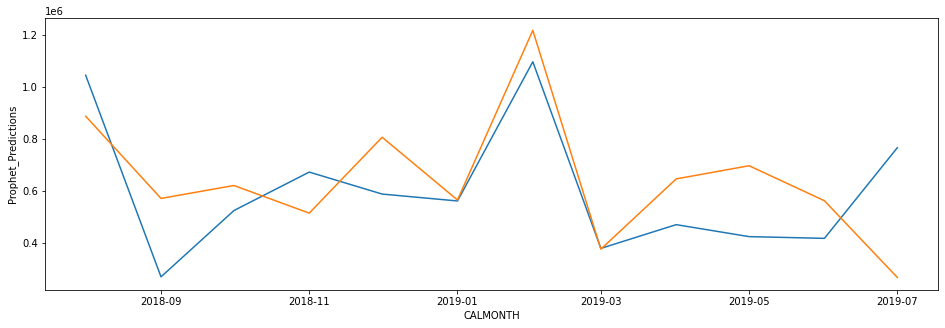

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data.DELIVERY_QTY)
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
prophet_rmse_error = rmse(test_data.DELIVERY_QTY, test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df.DELIVERY_QTY.mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 49294837762.685814
RMSE Error: 222024.40803363448
Mean: 632467.7209302326


In [ ]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

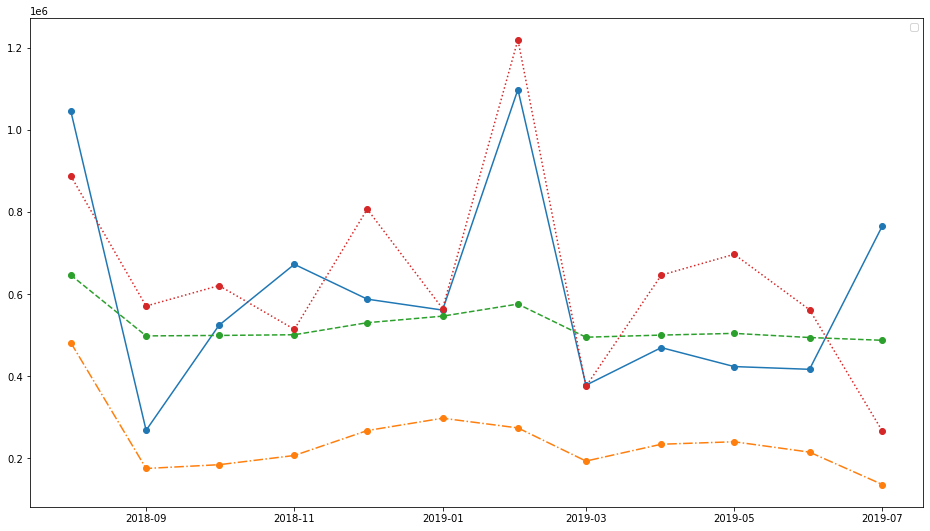

In [ ]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data.DELIVERY_QTY, linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [ ]:
print(f"Mean: {test_data.DELIVERY_QTY.mean()}")
errors

Mean: 600538.1666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,415583.359164,1.727095e+11
1,LSTM,228105.368570,5.203206e+10
2,Prophet,222024.408034,4.929484e+10


In [ ]:
test_data

,DELIVERY_QTY,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
CALMONTH,,,,
2018-08-01,1045646,481297.859303,645964.350128,8.876446e+05
2018-09-01,267702,174631.752569,497648.812831,5.703904e+05
2018-10-01,523570,183832.947229,498797.486187,6.202197e+05
2018-11-01,672050,206302.274069,500471.166348,5.136389e+05
2018-12-01,587186,267026.814836,529810.567919,8.064606e+05
2019-01-01,560580,297078.719913,545790.643710,5.642517e+05
2019-02-01,1097876,273456.258109,575187.744112,1.219080e+06
2019-03-01,377544,192709.937871,494461.346592,3.745889e+05
2019-04-01,469142,233710.726191,499637.041600,6.457386e+05
